# 0 引言
本文是 Python 系列的第六篇

Pandas 是 Python 为解决数据分析而创建的，详情看官网 (https://pandas.pydata.org/)。 在使用 pandas 之前，需要引进它，语法如下：

In [5]:
import pandas

这样你就可以用 pandas 里面所有的内置方法 (build-in methods) 了，比如创建一维的 Series 和二维的 DataFrame。

In [6]:
pandas.Series()
pandas.DataFrame()

""


但是每次写 pandas 字数有点多，通常我们给 pandas 起个别名 pd，用以下语法，这样所有出现 pandas 的地方都可以用 pd 替代。

In [7]:
import pandas as pd

Pandas 里面的数据结构是「多维数据表」，学习它可以类比这 NumPy 里的「多维数组」。1/2/3 维的「多维数据表」分别叫做 Series (系列), DataFrame (数据帧) 和 Panel (面板)，和1/2/3 维的「多维数组」的类比关系如下。

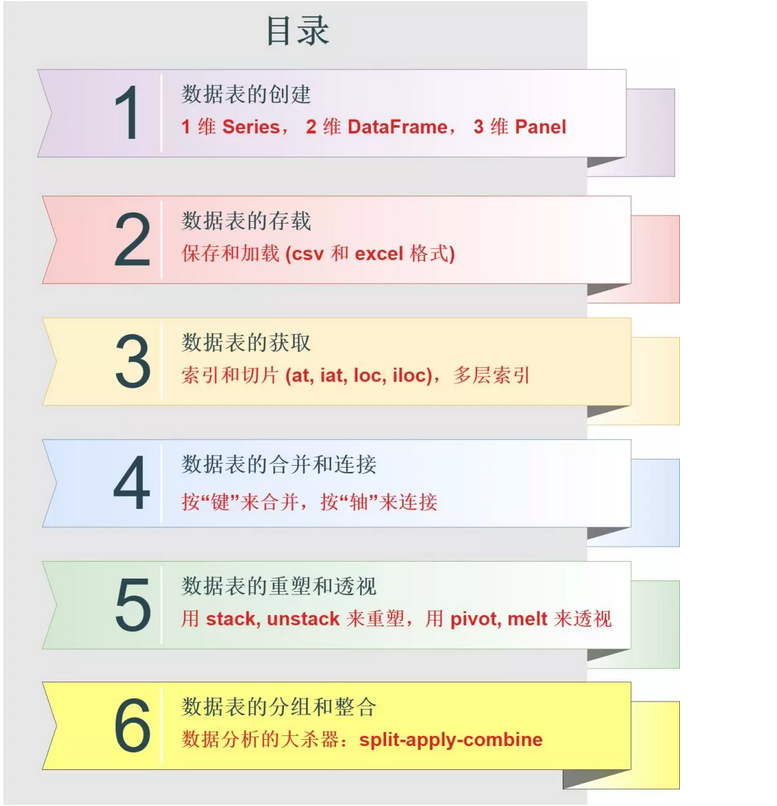

由于「系列」、「数据帧」和「面板」这些直译过来的中文名词听起来有些奇怪，在本帖还是直接用 Series, DataFrame 和 Panel。

对比 NumPy (np) 和 Pandas (pd) 每个维度下的数据结构，不难看出
    pd 多维数据表 = np 多维数组 + 描述

其中

* Series = 1darray + index
* DataFrame = 2darray + index + columns
* Panel = 3darray + index + columns + item


每个维度上的「索引」使得「多维数据表」比「多维数组」涵盖更多的信息，如下图，左边的 2d array 仅仅储存了一组数值 (具体代表什么意思却不知道)，而右边的 DataFrame 一看就知道这是平安银行和茅台从 2018-1-3 到 2019-1-3 的价格。

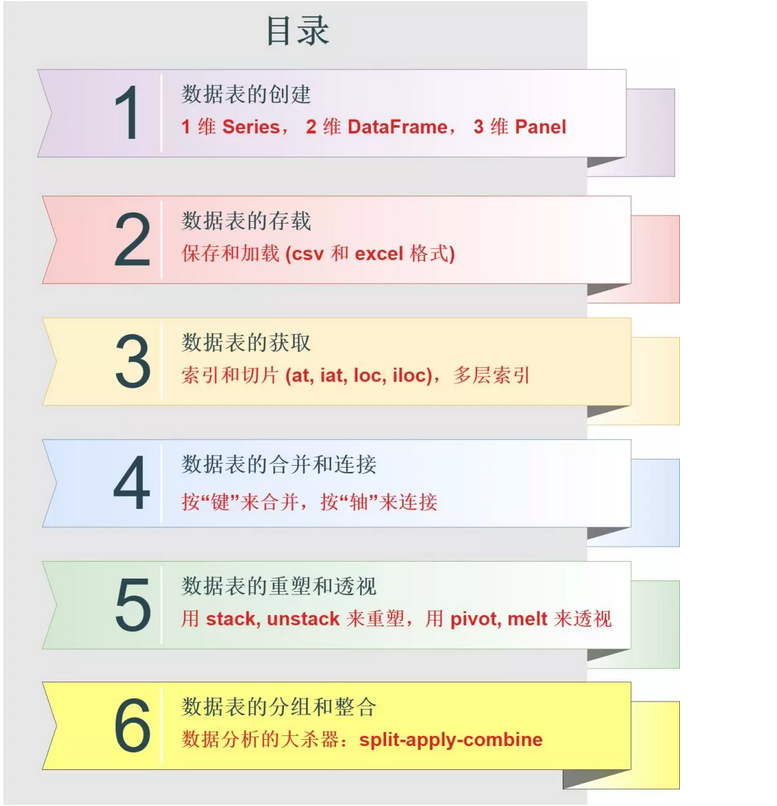

和学习 numpy 一样，学习 pandas 还是遵循的 Python 里「万物皆对象」的原则，既然把数据表当对象，我们就按着数据表的创建、数据表的存载、数据表的获取、数据表的合并和连接、数据表的重塑和透视、和数据表的分组和整合来盘一盘 Pandas，目录如下：

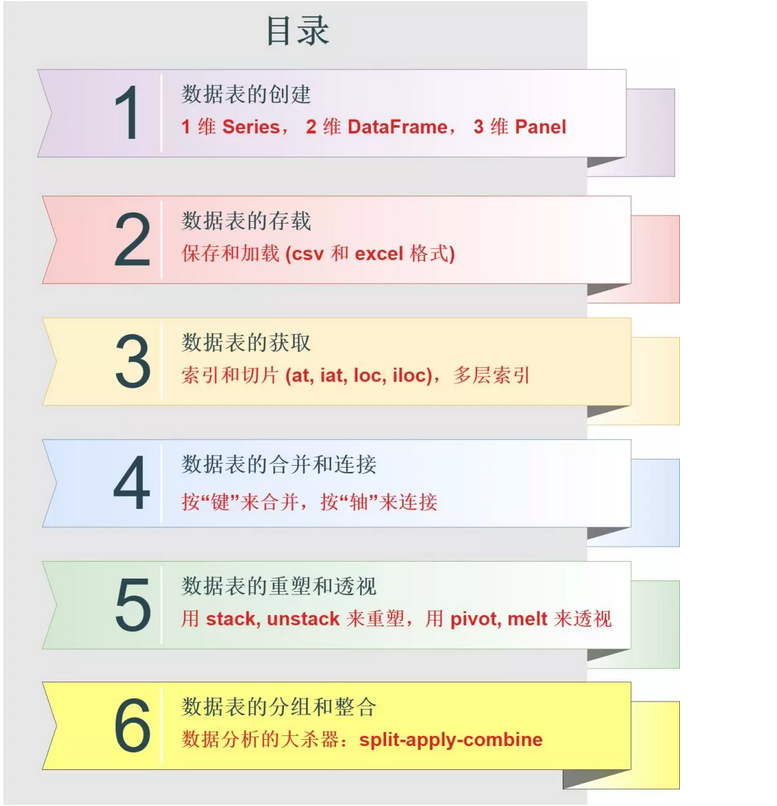

由于篇幅原因，Pandas 系列分两贴，上贴讲前三节的内容，下帖讲后三节的内容。

# 1 数据表的创建

数据表有三大类型

   * Series: 一维数据，类似于 python 中的基本数据的 list 或 NumPy 中的 1D array。Pandas 里最基本的数据结构

   * DataFrame: 二维数据，类似于 R 中的 data.frame 或 Matlab 中的 Tables。DataFrame 是 Series 的容器

   * Panel：三维数据。Panel 是 DataFrame 的容器
    

DataFrame 可理解成是 Series 的容器，每一列都是一个 Series，或者 Series 是只有一列的 DataFrame。

Panel 可理解成是 DataFrame 的容器。

接下来我们用代码来创建 pandas 数据表，有两种方式：

1. 按步就班的用 pd.Series(), pd.DataFrame() 和 pd.Panel()
2. 一步登天的用万矿里面的 WindPy API 读取

## 2.1 按部就班法

### 一维 Series
创建 Series 只需要下面一行代码
    pd.Series(x, index=idx)
其中 x 可以是：
1. 列表
2. numpy数组（ndarray）
3. 字典

回顾在〖Python 入门篇 (下)〗讲的函数里可以设定不同参数，那么

x 是位置参数
index 是默认参数，默认值为 idx = range(0, len(x))

#### 用列表

In [8]:
s = pd.Series([27.2, 27.65, 27.70, 28])
s

0    27.20
1    27.65
2    27.70
3    28.00
dtype: float64

打印出来并不仅仅是列表里面的浮点数，每个浮点数前面还有一个索引，在本例中是 0, 1, 2, 3。

因此在创建 Series 时，如果不显性设定 index，那么 Python 给定一个默认从 0 到 N-1 的值，其中 N 是 x 的长度。

Series s 也是一个对象，用 dir(s) 可看出关于 Series 所有的属性和内置函数，其中最重要的是

* 用 s.values 打印 s 中的元素
* 用 s.index 打印 s 中的元素对应的索引

In [9]:
s.values

array([27.2 , 27.65, 27.7 , 28.  ])

In [10]:
s.index

RangeIndex(start=0, stop=4, step=1)

不难发现，以上创建的 Series 和 numpy 数组比多了「索引」，但这种 0,1,2,3 的索引是在没有什么描述意义。实际上我们定义的 s 是海底捞在 2019 年 4 月 1 日到 2019 年 4 月 4 日的股价，那么用日期来当索引是不是更好些？

In [11]:
dates = pd.date_range('20190501', periods=4)
s2 = pd.Series( [27.2, 27.65, 27.70, 28], index=dates )
s2

2019-05-01    27.20
2019-05-02    27.65
2019-05-03    27.70
2019-05-04    28.00
Freq: D, dtype: float64

显然，s2 比 s 包含的信息更多，这是 s2 的索引是一组日期对象，数据类型是 datetime64，频率是 D (天)。


In [12]:
s2.index

DatetimeIndex(['2019-05-01', '2019-05-02', '2019-05-03', '2019-05-04'], dtype='datetime64[ns]', freq='D')

你甚至还可以给 s2 命名，就叫海底捞股价如何？


In [13]:
s2.name = '海底捞股价'
s2

2019-05-01    27.20
2019-05-02    27.65
2019-05-03    27.70
2019-05-04    28.00
Freq: D, Name: 海底捞股价, dtype: float64

#### 用 numpy 数组

除了用列表，我们还可以用 numpy 数组来生成 Series。在下例中，我们加入缺失值 np.nan，并分析一下 Series 中另外 5 个属性或内置函数的用法：

* len: s 里的元素个数
* shape: s 的形状 (用元组表示)
* count: s 里不含 nan 的元素个数
* unique: 返回 s 里不重复的元素
* value_counts: 统计 s 里非 nan 元素的出现次数

对照上面函数的用法，下面的输出一看就懂了吧。

In [14]:
import numpy as np
s = pd.Series(np.array([27.2, 27.65, 27.70, 28, 28, np.nan]))
print( 'The length is', len(s) )
print( 'The shape is', s.shape )
print( 'The count is', s.count() )

The length is 6
The shape is (6,)
The count is 5


In [13]:
s.unique()

array([27.2 , 27.65, 27.7 , 28.  ,   nan])

In [15]:
s.value_counts()

28.00    2
27.70    1
27.65    1
27.20    1
dtype: int64

### 用字典

创建 Series 还可以用字典。字典的「键值对」的「键」自动变成了 Series 的索引 (index)，而「值」自动变成了Series 的值 (values)。代码如下 (下列用 name 参数来对 s3 命名)


In [16]:
data_dict = { 'BABA': 187.07, 'PDD': 21.83, 'JD': 30.79, 'BIDU': 184.77 }

s3 = pd.Series(data_dict, name='中概股')
s3.index.name = '股票代号'
s3

股票代号
BABA    187.07
PDD      21.83
JD       30.79
BIDU    184.77
Name: 中概股, dtype: float64

给 s3 起名中概股是因为阿里巴巴 (BABA)、拼多多 (PDD)、京东 (JD) 和百度 (BIDU) 都是中国公司但在美国上市的。此外还可以给 index 命名为 '股票代号'。

现在假设我们的股票代号为

In [17]:
stock = ['FB', 'BABA', 'PDD', 'JD']
s4 = pd.Series( data_dict, index=stock )
s4

FB         NaN
BABA    187.07
PDD      21.83
JD       30.79
dtype: float64

代号里多加了脸书 (FB)，而 sdata 字典中没有 FB 这个键，因此生成的 s4 在 FB 索引下对应的值为 NaN。再者，代号里没有百度 (BIDU)，因此 s4 里面没有 BIDU 对应的值 (即便 sdata 里面有)。

当两个 Series 进行某种操作时，比如相加，Python 会自动对齐不同 Series 的 index，如下面代码所示：

In [18]:
s3 + s4

BABA    374.14
BIDU       NaN
FB         NaN
JD       61.58
PDD      43.66
dtype: float64


### 二维 DataFrame 
创建 DataFrame 只需用下面一行代码

    pd.DataFrame( x, index=idx, columns=col )

其中 x 可以是

1. 二维列表 (list)
2. 二维 numpy 数组 (ndarray)
3. 字典 (dict)，其值是一维列表、numpy 数组或 Series
4. 另外一个 DataFrame

回顾在〖Python 入门篇 (下)〗讲的函数里可以设定不同参数，那么

* x 是位置参数
* index 是默认参数，默认值为 idx = range(0, x.shape[0])
* columns 是默认参数，默认值为 col = range(0, x.shape[1])

#### 用列表或 numpy 数组

In [19]:
df0 = pd.DataFrame([[1, 2, 3], [4, 5, 6]])
df1 = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6]]))
print(df0)
# print(df1)
df1

   0  1  2
0  1  2  3
1  4  5  6


,0,1,2
0,1,2,3
1,4,5,6


在创建 DataFrame 时，如果不显性设定 index 和 columns 时，那么Python 给它们默认值，其中

index = 0 到 r-1，r 是 x 的行数
colmns = 0 到 c-1，c 是 x 的列数


#### 用对象为列表的字典

In [20]:
symbol = ['BABA', 'JD', 'AAPL', 'MS', 'GS', 'WMT']
data = {'行业': ['电商', '电商', '科技', '金融', '金融', '零售'],
        '价格': [176.92, 25.95, 172.97, 41.79, 196.00, 99.55],
        '交易量': [16175610, 27113291, 18913154, 10132145, 2626634, 8086946],
        '雇员': [101550, 175336, 100000, 60348, 36600, 2200000]}
df2 = pd.DataFrame( data, index=symbol )
df2.name = '美股'
df2.index.name = '代号'

df2

,行业,价格,交易量,雇员
代号,,,,
BABA,电商,176.92,16175610,101550
JD,电商,25.95,27113291,175336
AAPL,科技,172.97,18913154,100000
MS,金融,41.79,10132145,60348
GS,金融,196.00,2626634,36600
WMT,零售,99.55,8086946,2200000


字典的「键值对」的「键」自动变成了 DataFrame 的栏 (columns)，而「值」自动变成了 DataFrame 的值 (values)，而其索引 (index) 需要另外定义。

分别来看 df2 的 values, columns 和 index。

In [36]:
df2.values

array([['电商', 176.92, 16175610, 101550],
       ['电商', 25.95, 27113291, 175336],
       ['科技', 172.97, 18913154, 100000],
       ['金融', 41.79, 10132145, 60348],
       ['金融', 196.0, 2626634, 36600],
       ['零售', 99.55, 8086946, 2200000]], dtype=object)

In [21]:
df2.columns

Index(['行业', '价格', '交易量', '雇员'], dtype='object')

In [22]:
df2.index

Index(['BABA', 'JD', 'AAPL', 'MS', 'GS', 'WMT'], dtype='object', name='代号')

#### A 查看 DataFrame
我们可以从头或从尾部查看 DataFrame 的 n 行，分别用 df2.head() 和 df2.tail(n)，如果没有设定 n，默认值为 5 行。

In [23]:
df2.head()

,行业,价格,交易量,雇员
代号,,,,
BABA,电商,176.92,16175610,101550
JD,电商,25.95,27113291,175336
AAPL,科技,172.97,18913154,100000
MS,金融,41.79,10132145,60348
GS,金融,196.00,2626634,36600


In [43]:
df2.tail(3)

,行业,价格,交易量,雇员
代号,,,,
MS,金融,41.79,10132145,60348
GS,金融,196.00,2626634,36600
WMT,零售,99.55,8086946,2200000


#### B 统计 DataFrame
我们用 df2.describe() 还可以看看 DataFrame 每栏的统计数据。

In [24]:
df2.describe()

,价格,交易量,雇员
count,6.000000,6.000000e+00,6.000000e+00
mean,118.863333,1.384130e+07,4.456390e+05
std,73.748714,8.717312e+06,8.607522e+05
min,25.950000,2.626634e+06,3.660000e+04
25%,56.230000,8.598246e+06,7.026100e+04
50%,136.260000,1.315388e+07,1.007750e+05
75%,175.932500,1.822877e+07,1.568895e+05
max,196.000000,2.711329e+07,2.200000e+06


函数 describe() 只对「数值型变量」有用 (没有对「字符型变量」行业栏做统计)，统计量分别包括个数、均值、标准差、最小值，25-50-75 百分数值，最大值。一般做数据分析第一步会用这个表大概看看

* 数据是否有缺失值 (每个栏下的 count 是否相等)？
* 数据是否有异常值 (最小值 min 和最大值 max 是否太极端)？

#### C 升维 DataFrame
我们用 MultiIndex.from_tuples() 还可以赋予 DataFrame 多层索引 (实际上增加了维度，多层索引的 DataFrame 实际上是三维数据)。



In [25]:
df2.index = pd.MultiIndex.from_tuples( 
            [('中国公司','BABA'), ('中国公司','JD'), 
             ('美国公司','AAPL'), ('美国公司','MS'), 
             ('美国公司','GS'), ('美国公司','WMT')] )
df2

行业      价格       交易量       雇员
中国公司 BABA  电商  176.92  16175610   101550
     JD    电商   25.95  27113291   175336
美国公司 AAPL  科技  172.97  18913154   100000
     MS    金融   41.79  10132145    60348
     GS    金融  196.00   2626634    36600
     WMT   零售   99.55   8086946  2200000

在 MultiIndex.from_tuples() 中传递一个「元组的列表」，每个元组，比如 ('中国公司', 'BABA')，第一个元素中国公司是第一层 index，第二个元素BABA是第二层 index。


DataFrame 是 Series 的容器，那什么是 DataFrame 的容器？Panel!

### 三维 Panel
**首先需要指出的是 Panel 在未来版本中会被废除，因此不想花时间看的同学可跳过。**

创建 Panel 只需用下面一行代码

    pd.Panel( x, item=itm, major_axis=n1, minor_axis=n2 )

其中 x 可以是

1. 三维列表 (list)
2. 三维 numpy 数组 (ndarray)
3. 字典 (dict)，其值是 DataFrame

回顾在〖Python 入门篇 (下)〗讲的函数里可以设定不同参数，那么

* x 是位置参数
* items 是默认参数 (axis 0)，默认值为 itm = range(0, number of DataFrame)
* major_axis 是默认参数 (axis 1)，默认值和 DataFrame 的默认 index 一样
* minor_axis 是默认参数 (axis 2)，默认值和 DataFrame 的默认 columns 一样

#### 用 numpy 数组

In [26]:
pn = pd.Panel(np.random.randn(2, 5, 4))
pn

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2961: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.panel.Panel'>
Dimensions: 2 (items) x 5 (major_axis) x 4 (minor_axis)
Items axis: 0 to 1
Major_axis axis: 0 to 4
Minor_axis axis: 0 to 3

Panel pn 含有 2 个 DataFrame，items 为 0, 1；每个 DataFrame 有 5 行 4 列，因此 major_axis 为 0,1,2,3,4，而 minor_axis 为 0,1,2,3。

#### 用对象为 DataFrame 的字典

In [27]:

dates = pd.date_range('20190401',periods=4)

data = {'开盘价': [27.2, 27.65, 27.70, 28],
        '收盘价': [27.1, 27.55, 27.45, 28.1]}
df1 = pd.DataFrame( data, index=dates )

data = {'开盘价': [367, 369.8, 378.2, 380.6],
        '收盘价': [369.5, 370.1, 380, 382.1]}
df2 = pd.DataFrame( data, index=dates )

p_data = {'海底捞' : df1, '腾讯' : df2}
pn = pd.Panel(p_data)
pn

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2961: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.panel.Panel'>
Dimensions: 2 (items) x 4 (major_axis) x 2 (minor_axis)
Items axis: 海底捞 to 腾讯
Major_axis axis: 2019-04-01 00:00:00 to 2019-04-04 00:00:00
Minor_axis axis: 开盘价 to 收盘价

分析上面的 Panel pn

有 2 个 DataFrame，items 为 '海底捞' 和 ‘腾讯’

每个 DataFrame 有 4 行 2 列
major_axis 从 2019-04-01 到 2019-04-04
minor_axis 为 ‘开盘价’ 和 ‘收盘价’

让我们来查看两个 DataFrame 的内容

In [28]:
pn['海底捞']

,开盘价,收盘价
2019-04-01,27.20,27.10
2019-04-02,27.65,27.55
2019-04-03,27.70,27.45
2019-04-04,28.00,28.10


In [29]:
pn['腾讯']

,开盘价,收盘价
2019-04-01,367.0,369.5
2019-04-02,369.8,370.1
2019-04-03,378.2,380.0
2019-04-04,380.6,382.1


上面这种 Panel 类型的数据在量化投资中还蛮常见，比如我们需要 10 个股票在 1 年时期的 OHLC 价格 (Open, High, Low, Close)，Panel 的 Items, Major_axis 和 Minor_axis 正好可以存储这样的三维数据。如果 Panel 要废掉，那用什么容器来储存三维数据呢？

用多层索引 (Multi-index) 的 DataFrame！

In [30]:
df = pd.concat([df1, df2])
code = ['海底捞', '腾讯']
midx = [(c, d) for c in code for d in dates]
df.index = pd.MultiIndex.from_tuples(midx)
df

开盘价     收盘价
海底捞 2019-04-01   27.20   27.10
    2019-04-02   27.65   27.55
    2019-04-03   27.70   27.45
    2019-04-04   28.00   28.10
腾讯  2019-04-01  367.00  369.50
    2019-04-02  369.80  370.10
    2019-04-03  378.20  380.00
    2019-04-04  380.60  382.10

首先用 concat() 函数 (下帖的内容) 将 df1 和 df2 连接起来；再用「列表解析法」生成 midx，它是一个元组的列表，c 是股票代码，d 是日期；最后放入 MultiIndex.from_tuples() 生成有多层索引的 DataFrame。

# 2 数据表的存载


本节讲数据表的「保存」和「加载」，在 NumPy 一贴已经提到过，数据的存载没什么技术含量

* 保存只是为了下次再用处理好的 DataFrame
* 加载可以不用重新再定义 DataFrame

DataFrame 可以被保存为 Excel, csv, SQL 和 HDF5 格式，其语句一看就懂，用 to_数据格式，具体如下：

* to_excel()
* to_csv()
* to_sql()
* to_hdf()

如果要加载某种格式的数据到 DataFrame 里，用 read_数据格式，具体如下：

* read_excel()
* read_csv()
* read_sql()
* read_hdf()

我们只用 excel 和 csv 格式举例。

### Excel 格式
用 pd.to_excel 函数将 DataFrame 保存为 .xlsx 格式，并保存到 ‘Sheet1’ 中，具体写法如下：

    pd.to_excel( '文件名'，'表名' )

In [31]:
df = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6]]))
df.to_excel('pd_excel.xlsx', sheet_name='Sheet1')

用 pd.read_excel( '文件名'，'表名' ) 即可加载该文件并存成 DataFrame 形式

In [32]:
df1 = pd.read_excel('pd_excel.xlsx', sheet_name='Sheet1')
df1

,0,1,2
0,1,2,3
1,4,5,6


### csv 格式
用 pd.to_csv 函数将 DataFrame 保存为 .csv 格式，注意如果 index 没有特意设定，最后不要把 index 值存到 csv 文件中。具体写法如下：

    pd.to_csv( '文件名'，index=False )


In [33]:
data = {'Code': ['BABA', '00700.HK', 'AAPL', '600519.SH'],
        'Name': ['阿里巴巴', '腾讯', '苹果', '茅台'],
        'Market': ['US', 'HK', 'US', 'SH'],
        'Price': [185.35, 380.2, 197, 900.2],
        'Currency': ['USD', 'HKD', 'USD', 'CNY']}
df = pd.DataFrame(data)
df.to_csv('pd_csv.csv', index=False)

用 pd.read_csv( '文件名' ) 即可加载该文件并存成 DataFrame 形式

In [34]:
df2 = pd.read_csv('pd_csv.csv')
df2

,Code,Name,Market,Price,Currency
0,BABA,阿里巴巴,US,185.35,USD
1,00700.HK,腾讯,HK,380.20,HKD
2,AAPL,苹果,US,197.00,USD
3,600519.SH,茅台,SH,900.20,CNY


如果一开始储存 df 的时候用 index=True，你会发现加载完后的 df2 是以下的样子。

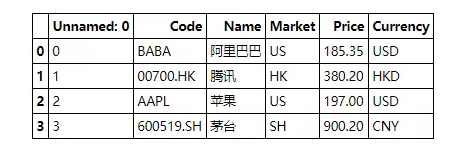

df2 里面第一栏是 df 的 index，由于没有具体的 columns 名称，系统给它一个 "Unamed: 0"。因此在存储 df 的时候，如果 df.index 没有特意设定，记住要在 to_csv() 中把 index 设置为 False。

# 3 数据表的索引和切片

由于索引/切片 Series 跟 numpy 数组很类似，由于 Panel 在未来会被废掉，因此本节只专注于对 DataFrame 做索引和切片。本节以下面 df 为例做展示。

In [35]:
symbol = ['BABA', 'JD', 'AAPL', 'MS', 'GS', 'WMT']
data = {'行业': ['电商', '电商', '科技', '金融', '金融', '零售'],
        '价格': [176.92, 25.95, 172.97, 41.79, 196.00, 99.55],
        '交易量': [16175610, 27113291, 18913154, 10132145, 2626634, 8086946],
        '雇员': [101550, 175336, 100000, 60348, 36600, 2200000]}
df = pd.DataFrame( data, index=symbol )
df.name='美股'
df.index.name = '代号'
df

,行业,价格,交易量,雇员
代号,,,,
BABA,电商,176.92,16175610,101550
JD,电商,25.95,27113291,175336
AAPL,科技,172.97,18913154,100000
MS,金融,41.79,10132145,60348
GS,金融,196.00,2626634,36600
WMT,零售,99.55,8086946,2200000


用不同颜色标注了 df 的 index, columns 和 values，可视图如下：
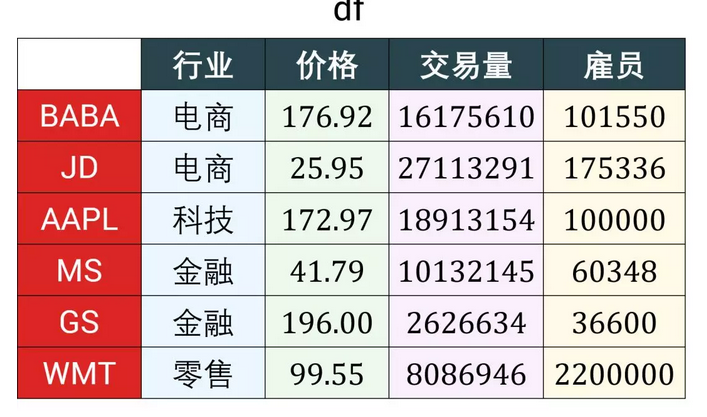



DataFrame 的索引或切片可以基于标签 (label-based) ，也可以基于位置 (position-based)，不像 numpy 数组的索引或切片只基于位置。

DataFrame 的索引或切片有四大类：

* 索引单元素：
    * 基于标签的 at
    * 基于位置的 iat

* 切片 columns：
    * 用 . 来切片单列
    * 用 [] 来切片单列或多列
    * 基于标签的 loc
    * 基于位置的 iloc

* 切片 index：
    * 用 [] 来切片单行或多行
    * 基于标签的 loc
    * 基于位置的 iloc

* 切片 index 和 columns：

    * 基于标签的 loc
    * 基于位置的 iloc

总体规律，基于标签就用 at 和 loc，基于位置就用 iat 和 iloc。下面我们来一类类分析：

### 3.1 索引单元素


两种方法来索引单元素，情况 1 基于标签 at，情况 2 基于位置 iat。
    * 情况 1 - df.at['idx_i', 'attr_j']
    * 情况 2 - df.iat[i, j]
 
Python 里的中括号 [] 会代表很多意思，比如单元素索引，多元素切片，布尔索引等等，因此让 Python 猜你用的 [] 意图会很低效。如果你想索引单元素，明明白白的用 at 和 iat 效率最高。

* 情况1

In [36]:
df.at['AAPL', '价格']

172.97

用 at 获取「行标签」为 'AAPL' 和「列标签」为 ‘价格’ 对应的元素。

* 情况 2

In [38]:
df.iat[2,1]

172.97

用 iat 获取第 3 行第 2 列对应的元素。

索引单元素的总结图：
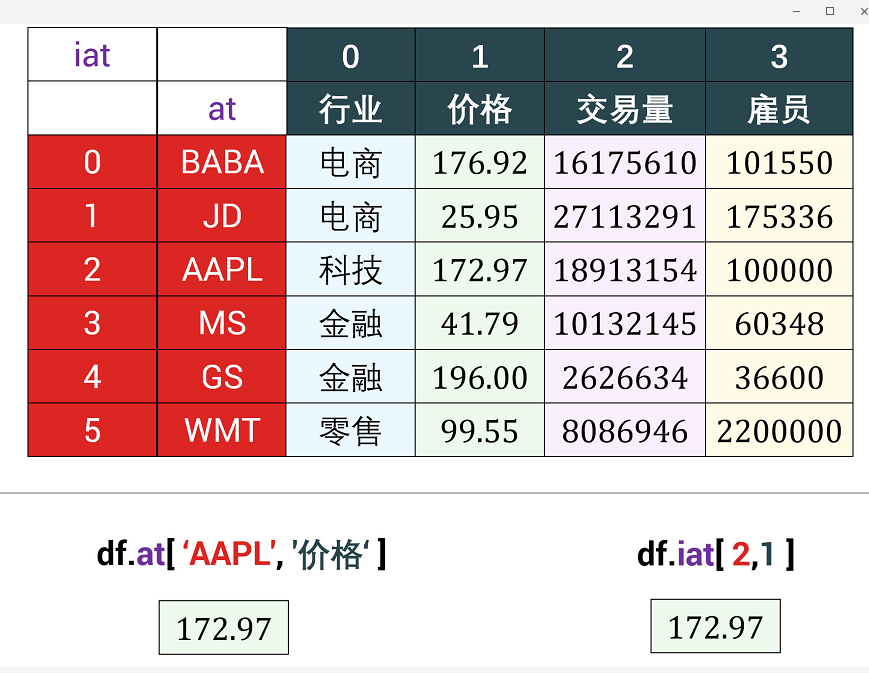


### 3.2 切片 columns

#### 切片单个 columns
切片单个 columns 会返回一个 Series，有以下四种情况。情况 1 用点 .；情况 2 用中括号 []；情况 3 基于标签 loc，情况 4 基于位置 iloc。

    * 情况 1 - df.attr_i
    * 情况 2 - df['attr_i']
    * 情况 3 - df.loc[:, 'attr_i']
    * 情况 4 - df.iloc[:, i]

情况 1 记住就可以了，没什么可说的。

情况 2 非常像二维 numpy 数组 arr 的切片，用 arr[i] 就能获取 arr 在「轴 0」上的第 i 个元素 (一个 1darray)，同理 df['attr_i'] 也能获取 df 的第 i 个 Series。

情况 3 和 4 的 loc 和 iloc 可类比于上面的 at 和 iat。带 i 的基于位置 (位置用整数表示，i 也泛指整数)，不带 i 的基于标签。里面的冒号 : 代表所有的 index (和 numpy 数组里的冒号意思相同)。

个人建议，如果追求简洁和方便，用 . 和 []；如果追求一致和清晰，用 loc 和 iloc。

In [39]:
df.价格

代号
BABA    176.92
JD       25.95
AAPL    172.97
MS       41.79
GS      196.00
WMT      99.55
Name: 价格, dtype: float64

In [40]:
df['价格']

代号
BABA    176.92
JD       25.95
AAPL    172.97
MS       41.79
GS      196.00
WMT      99.55
Name: 价格, dtype: float64

In [42]:
df.loc[:, '价格']

代号
BABA    176.92
JD       25.95
AAPL    172.97
MS       41.79
GS      196.00
WMT      99.55
Name: 价格, dtype: float64

In [44]:
df.iloc[:, 1]

代号
BABA    176.92
JD       25.95
AAPL    172.97
MS       41.79
GS      196.00
WMT      99.55
Name: 价格, dtype: float64

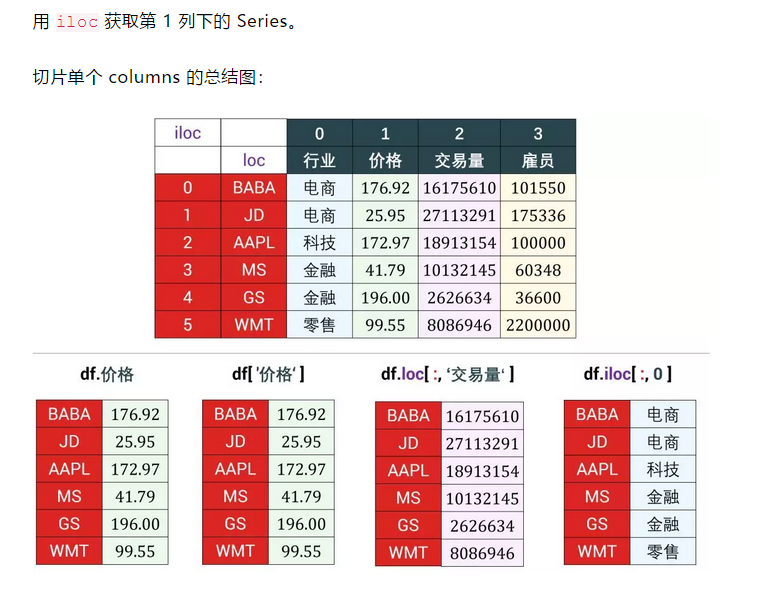

### 3.3 切片 index

#### 切片单个index

切片单个 index 有时会返回一个 Series，有以下两种情况。情况 1 基于标签 loc，情况 2 基于位置 iloc。

* 情况 1 - df.loc['idx_i', :]
* 情况 2 - df.iloc[i, :]

切片单个 index 有时会返回一个只有一行的 DataFrame，有以下两种情况。情况 3 用中括号 [] 加「位置」，情况 4 用中括号 [] 加「标签」。

* 情况 3 - df[i:i+1]
* 情况 4 - df['idx_i':'idx_i']

情况 1 和 2 的 loc 和 iloc 可类比于上面的 at 和 iat。带 i 的基于位置 (位置用整数表示，i 也泛指整数)，不带 i 的基于标签。里面的冒号 : 代表所有的 columns (和 numpy 数组里的冒号意思相同)。

情况 3 用中括号 [] 加「位置」，位置 i:i+1 有前闭后开的性质。如果要获取第 i+1 行，需要用 i:i+1。

情况 4 用中括号 [] 加「标签」，标签没有前闭后开的性质。如果要获取标签 i，只需要用 'idx_i':'idx_i'。为什么不能只用 'idx_i' 呢？原因是 Python 会把 df['idx_i'] 当成切片 columns，然后发现属性中没有 'idx_i' 这一个字符，会报错的。

个人建议，只用 loc 和 iloc。情况 3 太麻烦，获取一行还要用 i:i+1。情况 4 的 df['idx_i'] 很容易和切片 columns 中的语句 df['attr_j'] 混淆。

In [45]:
df.loc['GS', :]

行业          金融
价格         196
交易量    2626634
雇员       36600
Name: GS, dtype: object

In [46]:
df.iloc[3, :]

行业           金融
价格        41.79
交易量    10132145
雇员        60348
Name: MS, dtype: object

In [47]:
df[1:2]

,行业,价格,交易量,雇员
代号,,,,
JD,电商,25.95,27113291,175336


df['JD':'JD']

In [48]:
df['JD':'JD']

,行业,价格,交易量,雇员
代号,,,,
JD,电商,25.95,27113291,175336


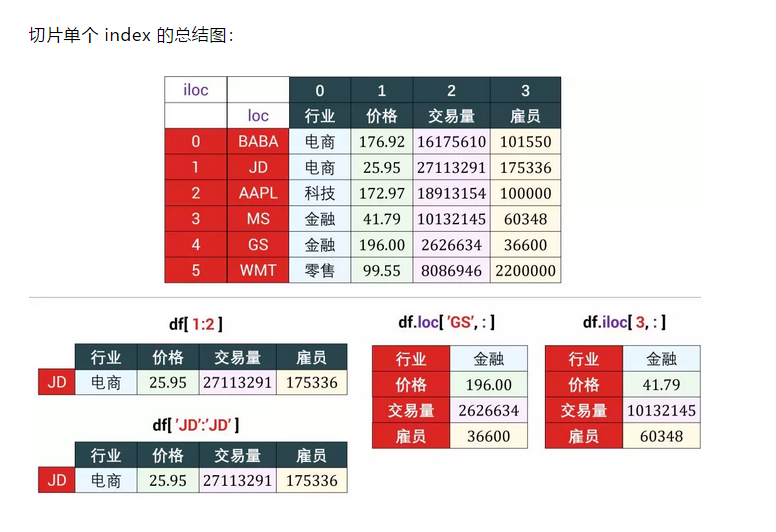

#### 切片多个index
切片多个 index 会返回一个 sub-DataFrame，有以下四种情况。情况 1 用中括号 [] 加「位置」，情况 2 用中括号 [] 加「标签」，情况 3 基于标签 loc，情况 4 基于位置 iloc。

* 情况 1 - df[i:j]
* 情况 2 - df['idx_i':'idx_j']
* 情况 3 - df.loc['idx_i':'idx_j', :]
* 情况 4 - df.iloc[i:j, :]

和切片单个 index 相比：

* 情况 1 用 [i:j] 来获取行 i+1 到行 j 的 sub-DataFrame
* 情况 2 用 ['idx_i':'idx_j'] 来获取标签 i 到标签 j 的 sub-DataFrame
* 情况 3 用 loc 加 'idx_i':'idx_j' 来获取从标签 i 到标签 j 的 sub-DataFrame
* 情况 4 用 iloc 加 i:j 来获取从行 i+1 到行 j 的 sub-DataFrame

个人建议，只用 loc 和 iloc。情况 1 和 2 的 df[] 很容易混淆中括号 [] 里的到底是切片 index 还是 columns。

In [51]:
df[1: 4]

,行业,价格,交易量,雇员
代号,,,,
JD,电商,25.95,27113291,175336
AAPL,科技,172.97,18913154,100000
MS,金融,41.79,10132145,60348


In [53]:
df['GS': 'WMT']

,行业,价格,交易量,雇员
代号,,,,
GS,金融,196.00,2626634,36600
WMT,零售,99.55,8086946,2200000


In [54]:
df.loc[ 'MS':'GS', : ]


,行业,价格,交易量,雇员
代号,,,,
MS,金融,41.79,10132145,60348
GS,金融,196.00,2626634,36600


In [55]:
df.iloc[ 1:3, : ]

,行业,价格,交易量,雇员
代号,,,,
JD,电商,25.95,27113291,175336
AAPL,科技,172.97,18913154,100000


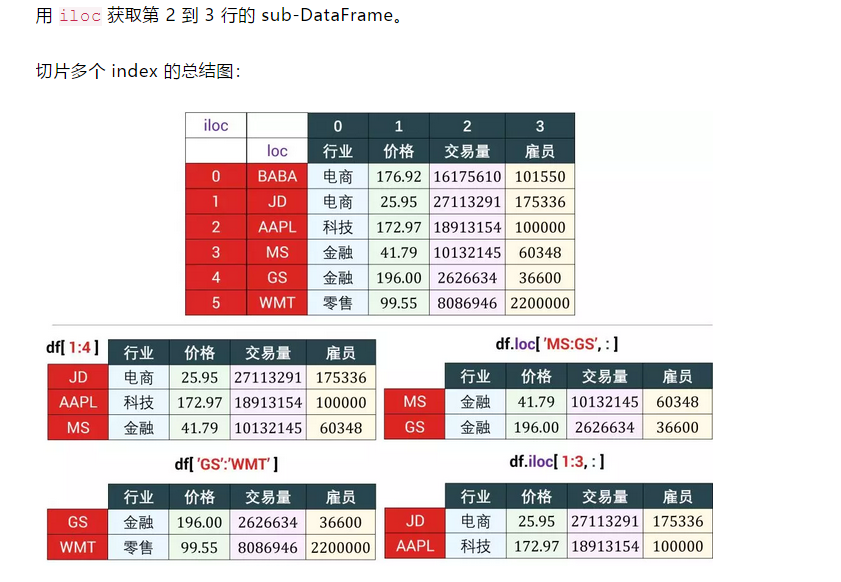

### 3.4 切片 index 和 columns
切片多个 index 和 columns 会返回一个 sub-DataFrame，有以下两种情况。情况 1 基于标签 loc，情况 2 基于位置 iloc。

* 情况 1 - df.loc['idx_i':'idx_j', 'attr_k':'attr_l']
* 情况 2 - df.iloc[i:j, k:l]

清清楚楚，明明白白，用 loc 和 iloc。

In [58]:

df.loc[ 'GS':'WMT', '价格':]

,价格,交易量,雇员
代号,,,
GS,196.00,2626634,36600
WMT,99.55,8086946,2200000


In [59]:
df.iloc[ :2, 1:3 ]

,价格,交易量
代号,,
BABA,176.92,16175610
JD,25.95,27113291


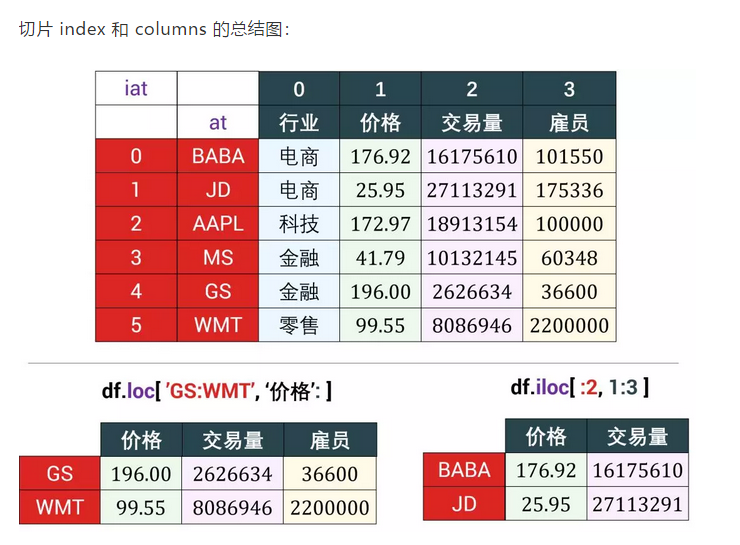

### 3.5 高级索引
高级索引 (advanced indexing) 可以用布尔索引 (boolean indexing) 和调用函数 (callable function) 来实现，两种方法都返回一组“正确”的索引，而且可以和 loc , iloc , [] 一起套用，具体形式有以下常见几种：

* df.loc[布尔索引, :] 
* df.iloc[布尔索引, :] 
* df[布尔索引] 
* df.loc[调用函数, :]  
* df.iloc[调用函数, :] 
* df[调用函数] 

还有以下罕见几种：

* df.loc[:, 布尔索引] 
* df.iloc[:, 布尔索引] 
* df.loc[:, 调用函数]  
* df.iloc[:, 调用函数] 

读者可以想一想为什么第一组形式「常见」而第二组形式「罕见」呢？(Hint: 看看两组里冒号 : 在不同位置，再想想 DataFrame 每一行和每一列中数据的特点)


#### 布尔索引
在〖数组计算之 NumPy (上)〗提过，布尔索引就是用一个由布尔类型值组成的数组来选择元素的方法。

当我们要过滤掉雇员小于 100,000 人的公司，我们可以用 loc 加上布尔索引。

In [60]:
print(df.雇员 >= 100000)
df.loc[df.雇员 >= 100000]

代号
BABA     True
JD       True
AAPL     True
MS      False
GS      False
WMT      True
Name: 雇员, dtype: bool


,行业,价格,交易量,雇员
代号,,,,
BABA,电商,176.92,16175610,101550
JD,电商,25.95,27113291,175336
AAPL,科技,172.97,18913154,100000
WMT,零售,99.55,8086946,2200000


一种更简便的表达形式是用 df[]，但是我个人不喜欢 []，总觉得会引起「到底在切片 index 还是 columns」的歧义。

In [61]:

df[ df.雇员 >= 100000 ]

,行业,价格,交易量,雇员
代号,,,,
BABA,电商,176.92,16175610,101550
JD,电商,25.95,27113291,175336
AAPL,科技,172.97,18913154,100000
WMT,零售,99.55,8086946,2200000


现在来看一个「罕见」例子，假如我们想找到所有值为整数型的 columns

In [62]:

print( df.dtypes == 'int64' )
df.loc[ :, df.dtypes == 'int64' ]

行业     False
价格     False
交易量     True
雇员      True
dtype: bool


,交易量,雇员
代号,,
BABA,16175610,101550
JD,27113291,175336
AAPL,18913154,100000
MS,10132145,60348
GS,2626634,36600
WMT,8086946,2200000


#### 调用函数


调用函数是只能有一个参数 (DataFrame, Series) 并返回一组索引的函数。因为调用函数定义在 loc , iloc , [] 里面，因此它就像在〖Python 入门篇 (下)〗提过的匿名函数。

当我们要找出交易量大于平均交易量的所有公司，我们可以用 loc 加上匿名函数 (这里 x 代表 df)。

In [63]:
df.loc[lambda x: x.交易量 > x.交易量.mean(), :]

,行业,价格,交易量,雇员
代号,,,,
BABA,电商,176.92,16175610,101550
JD,电商,25.95,27113291,175336
AAPL,科技,172.97,18913154,100000


在上面基础上再加一个条件 -- 价格要在 100 之上 (这里 x 还是代表 df)

In [70]:
df.loc[lambda x: (x.交易量 > x.交易量.mean()) & (x.价格 > 100),: ]

,行业,价格,交易量,雇员
代号,,,,
BABA,电商,176.92,16175610,101550
AAPL,科技,172.97,18913154,100000


最后来看看价格大于 100 的股票 (注意这里 x 代表 df.价格)

In [71]:
df.价格.loc[lambda x: x>100]

代号
BABA    176.92
AAPL    172.97
GS      196.00
Name: 价格, dtype: float64

### 3.6 多层索引

在 Panel 那节已经提到过，多层索引可以将「低维数据」升维到「高维数据」，此外，多层索引还可以。。。。

#### 多层索引 Series
首先定义一个 Series，注意它的 index 是一个二维列表，列表第一行 dates 作为第一层索引，第二行 codes 作为第二层索引。

In [73]:
price = [190,32,196,192,200,189,31,30,199]
dates = ['2019-04-01']*3 + ['2019-04-02']*2 + ['2019-04-03']*2 + ['2019-04-04']*2
codes = ['BABA','JD','GS','BABA','GS','BABA','JD','JD','GS']

data = pd.Series( price,
                  index=[ dates, codes ])
data

2019-04-01  BABA    190
            JD       32
            GS      196
2019-04-02  BABA    192
            GS      200
2019-04-03  BABA    189
            JD       31
2019-04-04  JD       30
            GS      199
dtype: int64

这个 Series 存储了四天里若干股票的价格，2019-04-01 储存了阿里巴巴、京东和高盛的股价，2019-04-04 只储存了京东和高盛的股价。试想，如果不用多层索引的 Series，我们需要用一个 DataFrame 来存储在这样的数据，把 index 设置成 dates，把 colums 设置成 codes。

让我们看看 Series 的多层 index 是如何表示的

In [74]:
data.index

MultiIndex(levels=[['2019-04-01', '2019-04-02', '2019-04-03', '2019-04-04'], ['BABA', 'GS', 'JD']],
           labels=[[0, 0, 0, 1, 1, 2, 2, 3, 3], [0, 2, 1, 0, 1, 0, 2, 2, 1]])

输出是一个 MultiIndex 的对象，里面有 levels 和 labels 二类信息。

知识点
索引既然分多层，那么肯定分「内层」和「外层」把，levels 就是描述层的先后的。levels 是一个二维列表，每一行只存储着「唯一」的索引信息：

* dates 是第一层索引，有 4 个「唯一」元素
* codes 是第二层索引，有 3 个「唯一」元素

但是 data 里面有九行啊，4 个 dates 和 3 个 codes 怎么能描述这九行信息呢？这就需要 labels 了。labels 也是一个二维列表：

* 第一行储存 dates 每个元素在 data 里的位置索引
* 第二行储存 codes 每个元素在 data 里的位置索引

In [75]:
data['2019-04-02']

BABA    192
GS      200
dtype: int64

同理，用 loc 加第一层索引也可以切片获取第一层信息。

In [76]:
data.loc['2019-04-02':'2019-04-04']

2019-04-02  BABA    192
            GS      200
2019-04-03  BABA    189
            JD       31
2019-04-04  JD       30
            GS      199
dtype: int64

此外，切片还可以在不同层上进行，下面 loc  中的冒号 : 表示第一层所有元素，‘GS’ 表示第二层标签为 ‘GS’。

In [77]:

data.loc[ :, 'GS' ]

2019-04-01    196
2019-04-02    200
2019-04-04    199
dtype: int64

#### 多层索引 DataFrame


Series 只有 index，上面刚介绍完多层 index，DataFrame 有 index 和 columns，它们可以设置成多层吗？下面代码用 MultiIndex 函数创建「多层 index 」midx 和「多层columns」mcol。

midx 和 mcol 都是对象，各种都有 levels, labels, names 等性质。

In [78]:
data = [ ['电商', 101550, 176.92, 16175610], 
         ['电商', 175336, 25.95, 27113291], 
         ['金融', 60348, 41.79, 10132145], 
         ['金融', 36600, 196.00, 2626634] ]

midx = pd.MultiIndex( 
          levels=[['中国','美国'],
                  ['BABA', 'JD', 'GS', 'MS']], 
          labels=[[0,0,1,1],[0,1,2,3]],
          names=['地区', '代号'])

mcol = pd.MultiIndex( 
          levels=[['公司数据','交易数据'],
                  ['行业','雇员','价格','交易量']], 
          labels=[[0,0,1,1],[0,1,2,3]],
          names=['概括','细分'])

df = pd.DataFrame(data, index=midx, columns=mcol)
df

概括      公司数据            交易数据          
细分        行业      雇员      价格       交易量
地区 代号                                 
中国 BABA   电商  101550  176.92  16175610
   JD     电商  175336   25.95  27113291
美国 GS     金融   60348   41.79  10132145
   MS     金融   36600  196.00   2626634

这个 DataFrame 的 index 和 columns 都有两层，严格来说是个四维数据。下面看看如何进行「多层索引」的操作吧。

在第一层 columns 的 ‘公司数据’ 和第二层 columns 的 ‘行业’ 做索引，得到一个含两层 index 的 Series。

In [79]:
df['公司数据','行业']

地区  代号  
中国  BABA    电商
    JD      电商
美国  GS      金融
    MS      金融
Name: (公司数据, 行业), dtype: object

在第一层 index 的 ‘中国’ 做切片，得到一个含两层 columns 的 DataFrame。

In [80]:
df.loc['中国'].loc['BABA':'JD']

概括   公司数据            交易数据          
细分     行业      雇员      价格       交易量
代号                                 
BABA   电商  101550  176.92  16175610
JD     电商  175336   25.95  27113291

调位 level

如果你不喜欢 index level 的顺序，可用 swaplevel 将它们调位。

In [82]:

df.swaplevel('地区', '代号')

概括      公司数据            交易数据          
细分        行业      雇员      价格       交易量
代号   地区                               
BABA 中国   电商  101550  176.92  16175610
JD   中国   电商  175336   25.95  27113291
GS   美国   金融   60348   41.79  10132145
MS   美国   金融   36600  196.00   2626634

如果你不喜欢 columns level 的顺序，也可用 swaplevel 将它们调位。

In [83]:
df.columns = df.columns.swaplevel(0,1)
df

细分        行业      雇员      价格       交易量
概括      公司数据    公司数据    交易数据      交易数据
地区 代号                                 
中国 BABA   电商  101550  176.92  16175610
   JD     电商  175336   25.95  27113291
美国 GS     金融   60348   41.79  10132145
   MS     金融   36600  196.00   2626634

重设 index

有时候，一个 DataFrame 的一个或者多个 columns 适合做 index，这时可用 set_index 将它们设置为 index，如果要将 index 还原成 columns，那么用 reset_index 。

看下面这个例子。


In [84]:
data = {'地区': ['中国', '中国', '美国', '美国'],
        '代号': ['BABA', 'JD', 'MS', 'GS'],
        '行业': ['电商', '电商', '金融', '金融'],
        '价格': [176.92, 25.95, 41.79, 196.00],
        '交易量': [16175610, 27113291, 10132145, 2626634],
        '雇员': [101550, 175336, 60348, 36600] }
df = pd.DataFrame( data )
df

,地区,代号,行业,价格,交易量,雇员
0,中国,BABA,电商,176.92,16175610,101550
1,中国,JD,电商,25.95,27113291,175336
2,美国,MS,金融,41.79,10132145,60348
3,美国,GS,金融,196.00,2626634,36600


将「地区」和「代号」设置为第一层 index 和第二层 index。

In [85]:
df2 = df.set_index( ['地区','代号'] )
df2

行业      价格       交易量      雇员
地区 代号                                
中国 BABA  电商  176.92  16175610  101550
   JD    电商   25.95  27113291  175336
美国 MS    金融   41.79  10132145   60348
   GS    金融  196.00   2626634   36600

将所有 index 变成 columns。

In [87]:
df2.reset_index()

,地区,代号,行业,价格,交易量,雇员
0,中国,BABA,电商,176.92,16175610,101550
1,中国,JD,电商,25.95,27113291,175336
2,美国,MS,金融,41.79,10132145,60348
3,美国,GS,金融,196.00,2626634,36600


# 4 总结

Pandas 里面的数据结构是多维数据表，细化为一维的 Series，二维的 DataFrame，三维的 Panel。

    多维数据表 = 多维数组 + 描述

其中

* Series = 1darray + index
* DataFrame = 2darray + index + columns
* Panel = 3darray + index + columns + item

pd 多维数据表和 np 多维数组之间的类比关系如下图所示。

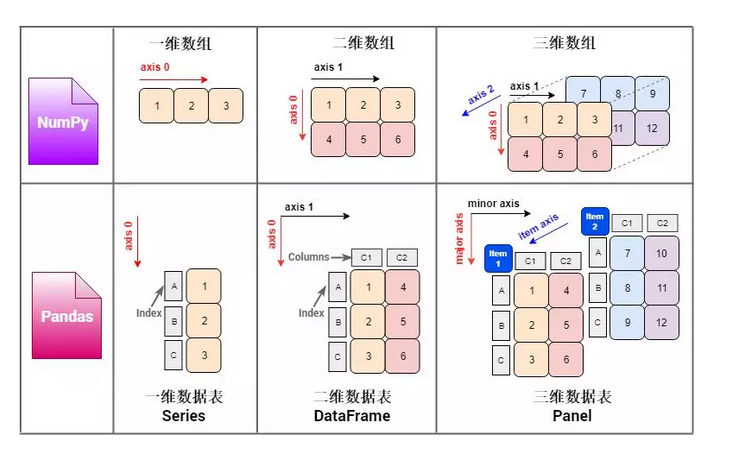

【创建数据表】创建 Series, DataFrame, Panel 用下面语句

* pd.Series(x, index=idx)
* pd.DataFrame(x, index=idx, columns=col)
* pd.Panel(x, item=itm, major_axis=n1, minor_axis=n2)

DataFrame 由多个 Series 组成，Panel 有多个 DataFrame 组成。Series 非常类似于一维的 DataFrame，Panel 未来会被废掉，因此学 Pandas 把注意力放在 DataFrame 上即可。


【索引和切片数据表】在索引或切片 DataFrame，有很多种方法。最好记的而不易出错的是用基于位置的 at 和 loc，和基于标签的 iat 和 iloc，具体来说，索引用 at 和 iat，切片用 loc 和 iloc。带 i 的基于位置，不带 i 的基于标签。

用 MultiIndex 可以创建多层索引的对象，获取 DataFrame df 的信息可用

* df.loc[1st].loc[2nd]
* df.loc[1st].iloc[2nd]
* df.iloc[1st].loc[2nd]
* df.iloc[1st].iloc[2nd]

要调换 level 可用

* df.index.swaplevel(0,1)
* df.columns.swaplevel(0,1)

要设置和重设 index 可用

* df.set_index( columns )
* df.reset_index


下篇讨论 Pandas 系列的后三节，分别是

* 「数据表的合并和连接」
* 「数据表的重塑和透视」
* 「数据表的分组和整合」
